In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,353.799988,355.489990,345.890015,349.589996,349.589996,3835100
1,2017-09-06,349.500000,350.980011,341.559998,344.529999,344.529999,4091400
2,2017-09-07,345.980011,352.480011,343.450012,350.609985,350.609985,4239200
3,2017-09-08,348.989990,349.779999,342.299988,343.399994,343.399994,3263500
4,2017-09-11,351.350006,363.709991,350.000000,363.690002,363.690002,7667100


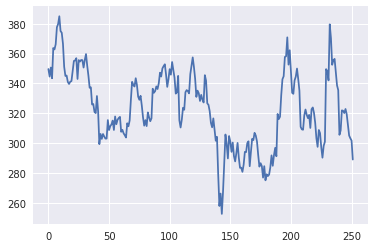

In [3]:
plt.plot(tesla.Close)
plt.show()

In [4]:
signal = np.copy(tesla.Close.values)

In [5]:
def removal(signal, period=10):
    copy_signal = np.copy(signal)
    for j in range(period):
        for i in range(3,len(signal)):
            copy_signal[i-1] = (copy_signal[i-2]+copy_signal[i])/2
    return copy_signal

In [6]:
removed_signal = removal(signal,30)

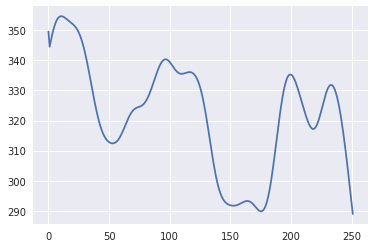

In [7]:
plt.plot(removed_signal)
plt.show()

In [8]:
def get(original_signal, removed_signal):
    buffer = []
    for i in range(len(removed_signal)):
        buffer.append(original_signal[i]-removed_signal[i])
    return np.array(buffer)

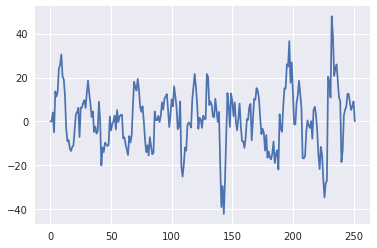

In [9]:
noise = get(signal, removed_signal)
plt.plot(noise)
plt.show()